# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 
import mediapipe as mp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pickle
import lightgbm as lgb


# Load Data


In [2]:
df=pd.read_csv('hand_landmarks_data.csv')

In [3]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Data information (No Null Values)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

C:\Users\mahmo\AppData\Local\Temp\ipykernel_23228\416719499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


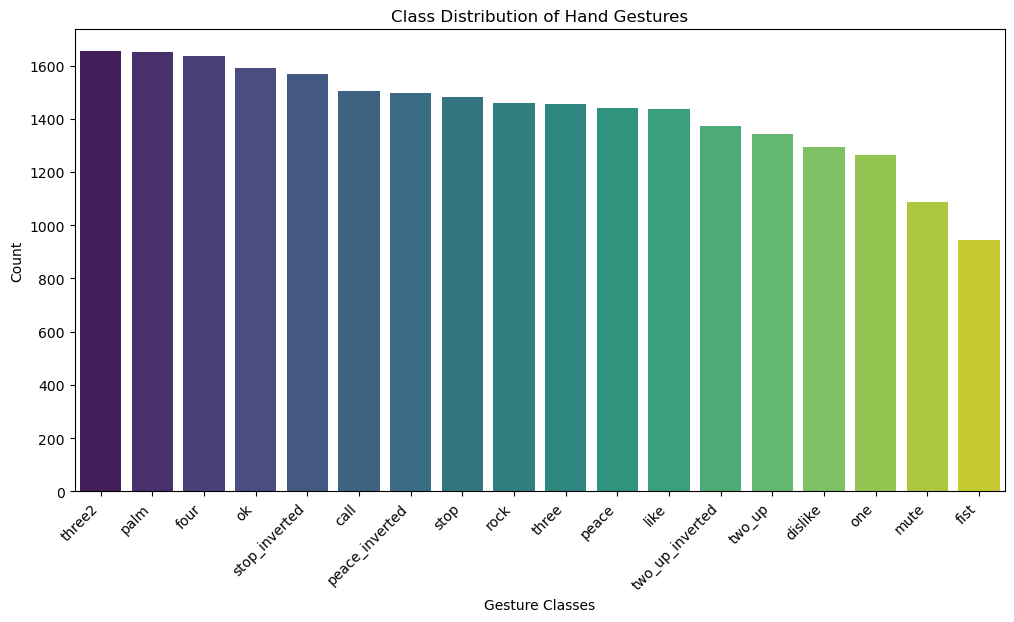

In [6]:
class_counts = df['label'].value_counts()

# Plot distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Gesture Classes")
plt.ylabel("Count")
plt.title("Class Distribution of Hand Gestures")
plt.show()

# Feature scaling 

In [5]:
x_columns = [col for col in df.columns if col.startswith('x')]
y_columns = [col for col in df.columns if col.startswith('y')]

df[x_columns] = df[x_columns].sub(df['x1'], axis=0)

df[y_columns] = df[y_columns].sub(df['y1'], axis=0)

euclidean_distance = np.sqrt((df['x13'] - df['x1'])**2 + (df['y13'] - df['y1'])**2)

euclidean_distance = euclidean_distance.replace(0, 1e-9)

# Normalize x and y columns
df[x_columns] = df[x_columns].div(euclidean_distance, axis=0)
df[y_columns] = df[y_columns].div(euclidean_distance, axis=0)

df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


In [7]:
features=df.drop('label' , axis=1)

labels=df['label']

# Splitting into train , test , validation


In [8]:
X_train , X_test , y_train , y_test= train_test_split(features , labels , train_size=0.8 , random_state=42)

x_val ,x_test , y_val , y_test=train_test_split(X_test,y_test , train_size=0.5 , random_state=42) 

In [9]:
print("Train Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation Class Distribution:\n", y_val.value_counts(normalize=True))
print("\nTest Class Distribution:\n", y_test.value_counts(normalize=True))


Train Class Distribution:
 label
palm               0.064849
three2             0.064362
four               0.063729
stop_inverted      0.061246
ok                 0.060954
call               0.059348
peace_inverted     0.057936
stop               0.057887
rock               0.056865
peace              0.056719
three              0.056378
like               0.055112
two_up_inverted    0.053165
two_up             0.052386
dislike            0.050389
one                0.049416
mute               0.043427
fist               0.035833
Name: proportion, dtype: float64

Validation Class Distribution:
 label
ok                 0.068952
peace_inverted     0.065446
palm               0.063109
three2             0.063109
like               0.062330
stop_inverted      0.058044
rock               0.057655
three              0.057655
stop               0.056486
four               0.055707
call               0.054538
peace              0.053370
dislike            0.052980
two_up             0.052201

# Applying 4 models

In [14]:
model_1 = LogisticRegression(max_iter=1000)
model_1.fit(X_train , y_train)


LogisticRegression(max_iter=1000)

LogisTic Regression Accuracy: 0.8512


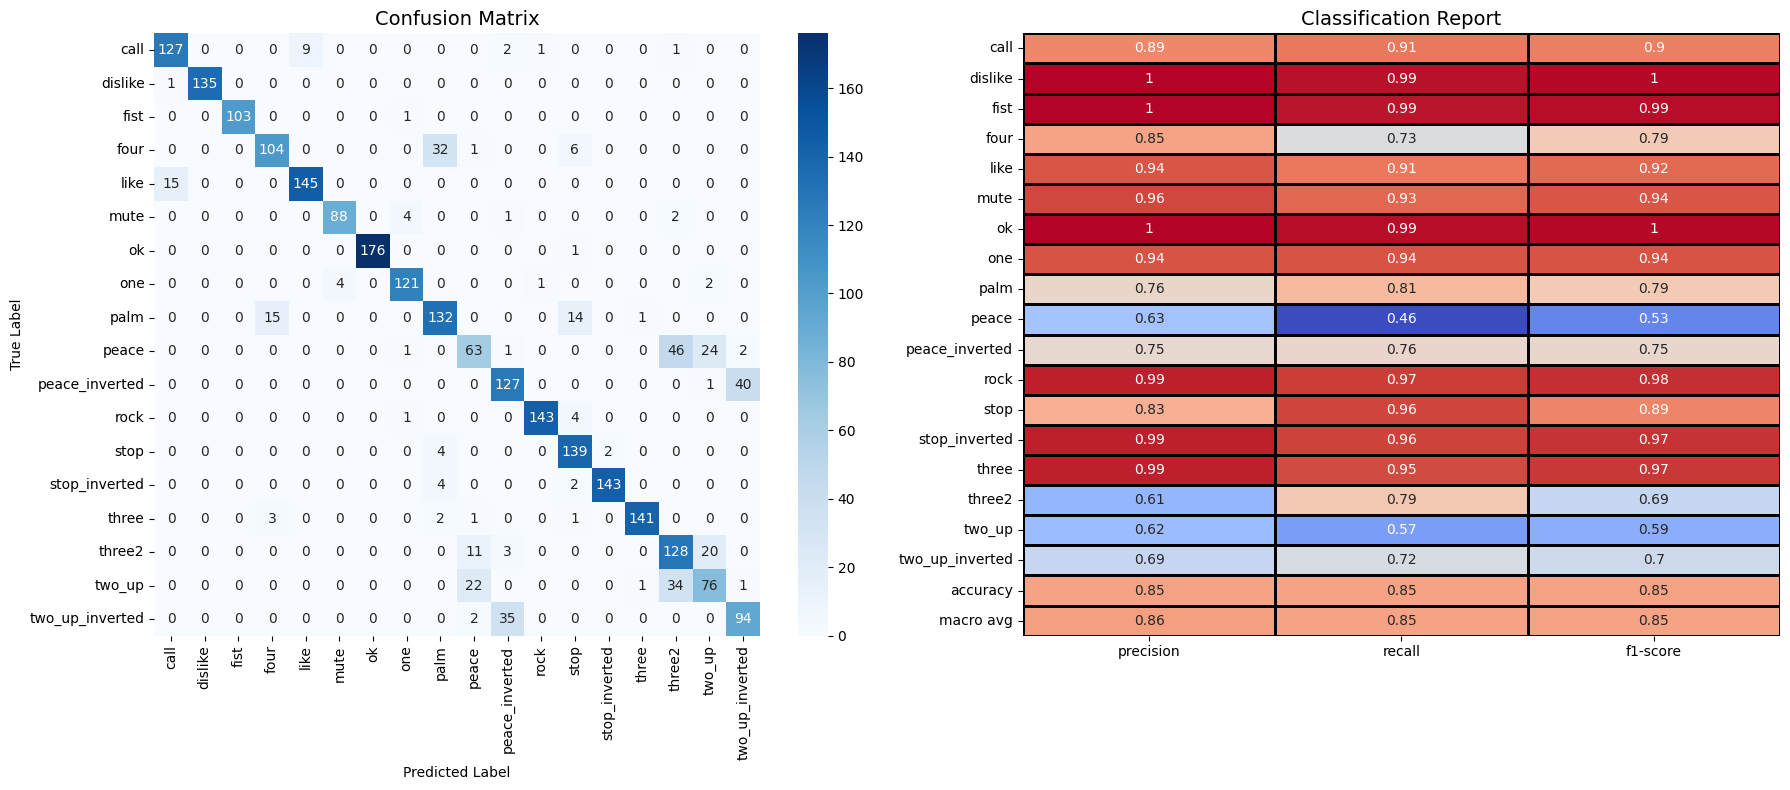

In [15]:
y_pred_1 = model_1.predict(x_val)
accuracy = accuracy_score(y_val, y_pred_1)
print(f"LogisTic Regression Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_val, y_pred_1)
class_names = (labels.unique())

# Convert Classification Report to DataFrame
class_report_dict = classification_report(y_val, y_pred_1, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T.round(3)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
model_2 = SVC()

model_2.fit(X_train , y_train)

SVC()

SVM Accuracy: 0.9252


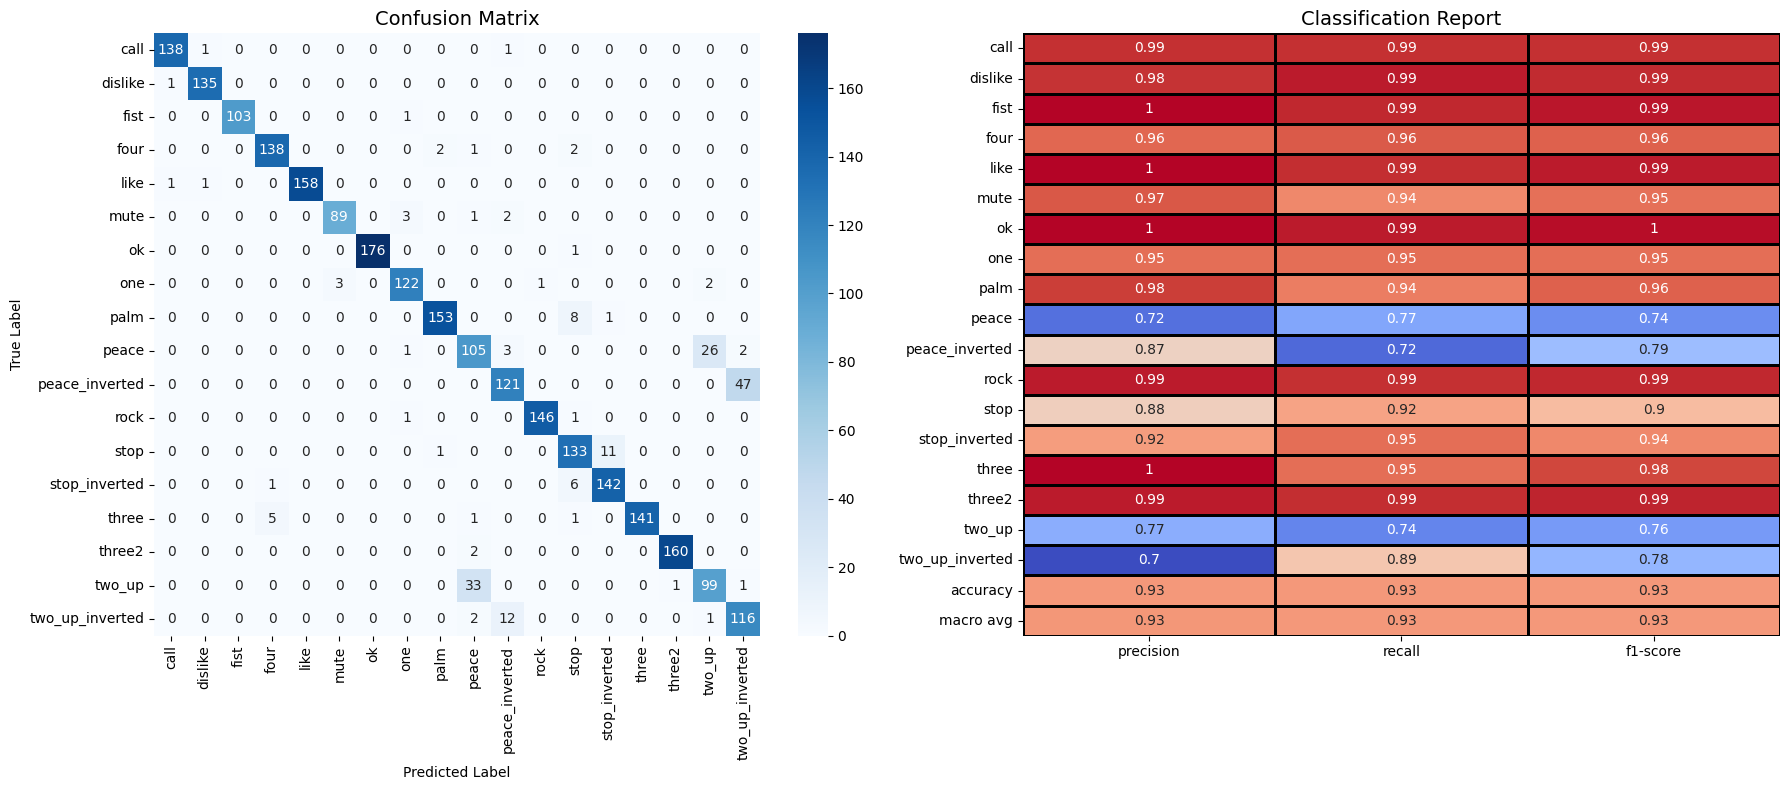

In [17]:
y_pred_2 = model_2.predict(x_val)
accuracy = accuracy_score(y_val, y_pred_2)
print(f"SVM Accuracy: {accuracy:.4f}")


conf_matrix = confusion_matrix(y_val, y_pred_2)
class_names = (labels.unique())

# Convert Classification Report to DataFrame
class_report_dict = classification_report(y_val, y_pred_2, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T.round(3)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

In [27]:
model_3 = RandomForestClassifier()

model_3.fit(X_train , y_train)


RandomForestClassifier()

Random Forest Accuracy: 0.9774


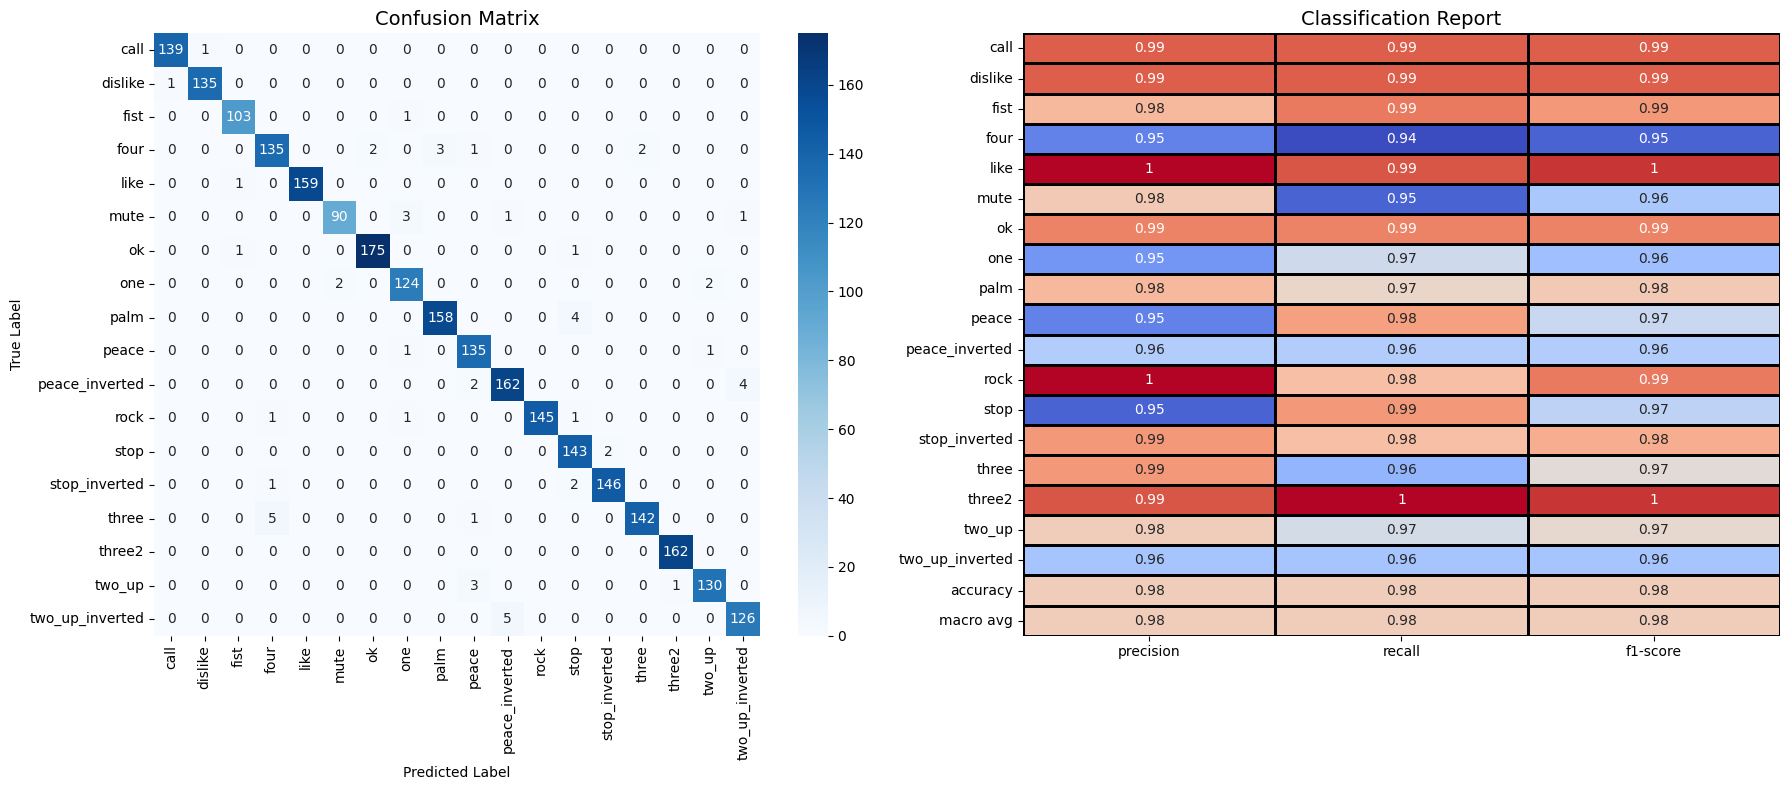

In [28]:
y_pred_3 = model_3.predict(x_val)
accuracy = accuracy_score(y_val, y_pred_3)
print(f"Random Forest Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred_3)
class_names = (labels.unique())

# Convert Classification Report to DataFrame
class_report_dict = classification_report(y_val, y_pred_3, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T.round(3)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)


LightGBM Accuracy: 0.9832


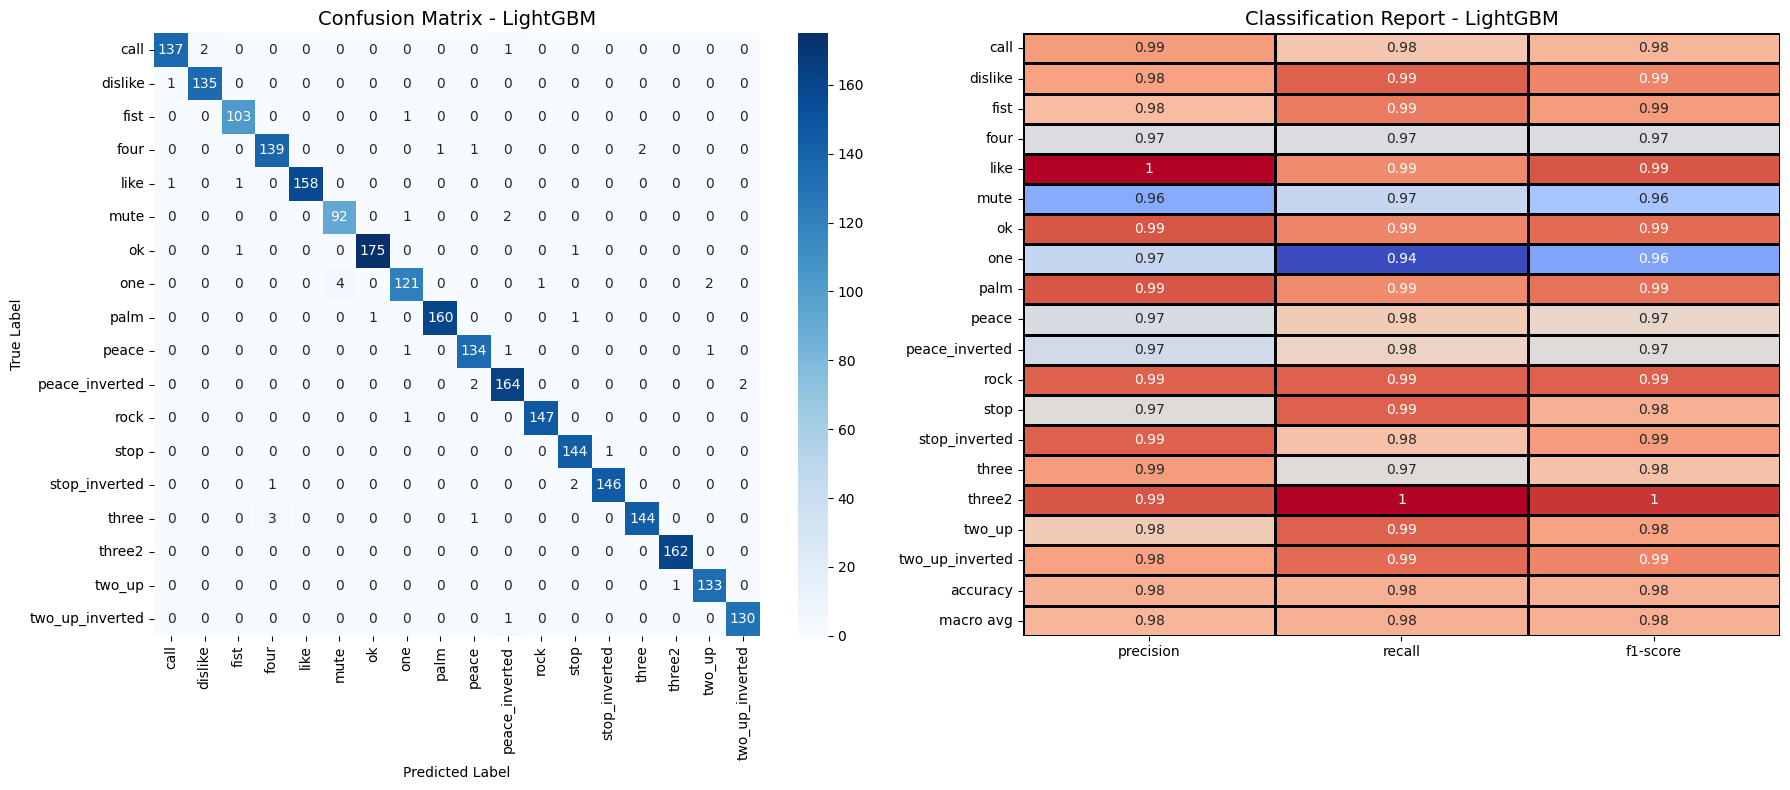

In [21]:
y_pred_lgb = model_lgb.predict(x_val)
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")

conf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)
class_names = labels.unique()

# Convert Classification Report to DataFrame
class_report_dict_lgb = classification_report(y_val, y_pred_lgb, output_dict=True)
class_report_df_lgb = pd.DataFrame(class_report_dict_lgb).T.round(3)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot Confusion Matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix - LightGBM", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df_lgb.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report - LightGBM", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

# Comparing Model Accuracies

In [22]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_val, y_pred_1):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_val, y_pred_2):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_val, y_pred_3):.4f}")
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")

Logistic Regression Accuracy: 0.8512
SVM Accuracy: 0.9252
Random Forest Accuracy: 0.9758
LightGBM Accuracy: 0.9832


# FineTuning Logistic regression and LightGBM

In [23]:
model_1_tuned = LogisticRegression(max_iter=1500 , C=200)
model_1_tuned.fit(X_train , y_train)

y_pred_1 = model_1_tuned.predict(x_val)
accuracy = accuracy_score(y_val, y_pred_1)
print(f"LogisTic Regression Accuracy after tuning: {accuracy:.4f}")

LogisTic Regression Accuracy after tuning: 0.9236


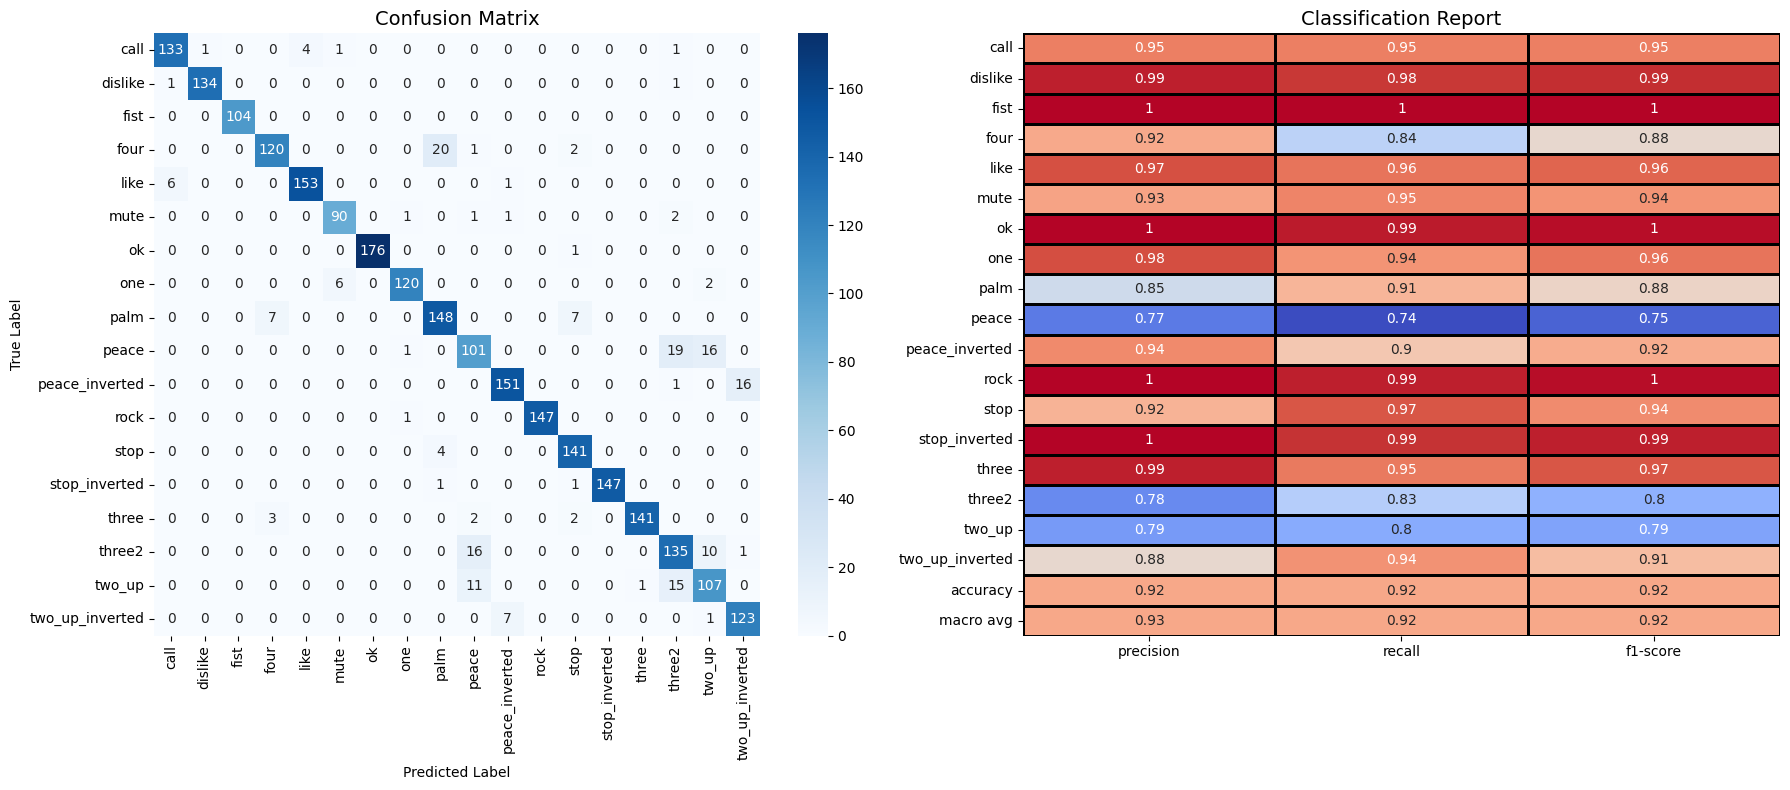

In [24]:
conf_matrix = confusion_matrix(y_val, y_pred_1)
class_names = (labels.unique())

# Convert Classification Report to DataFrame
class_report_dict = classification_report(y_val, y_pred_1, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T.round(3)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
model_2_tuned = lgb.LGBMClassifier( n_estimators=400, learning_rate=0.2, num_leaves=50)
model_2_tuned.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 20540, number of used features: 61
[LightGBM] [Info] Start training from score -2.824343
[LightGBM] [Info] Start training from score -2.987973
[LightGBM] [Info] Start training from score -3.328899
[LightGBM] [Info] Start training from score -2.753111
[LightGBM] [Info] Start training from score -2.898388
[LightGBM] [Info] Start training from score -3.136663
[LightGBM] [Info] Start training from score -2.797632
[LightGBM] [Info] Start training from score -3.007486
[LightGBM] [Info] Start training from score -2.735693
[LightGBM] [Info] Start training from score -2.869653
[LightGBM] [Info] Start training from score -2.848421
[LightGBM] [Info] Start training from score -2.867081
[LightGBM] [Info] Start training from score -2.849262
[LightGB

LGBMClassifier(learning_rate=0.2, n_estimators=400, num_leaves=50)

LightGBM Accuracy after tuning: 0.9840


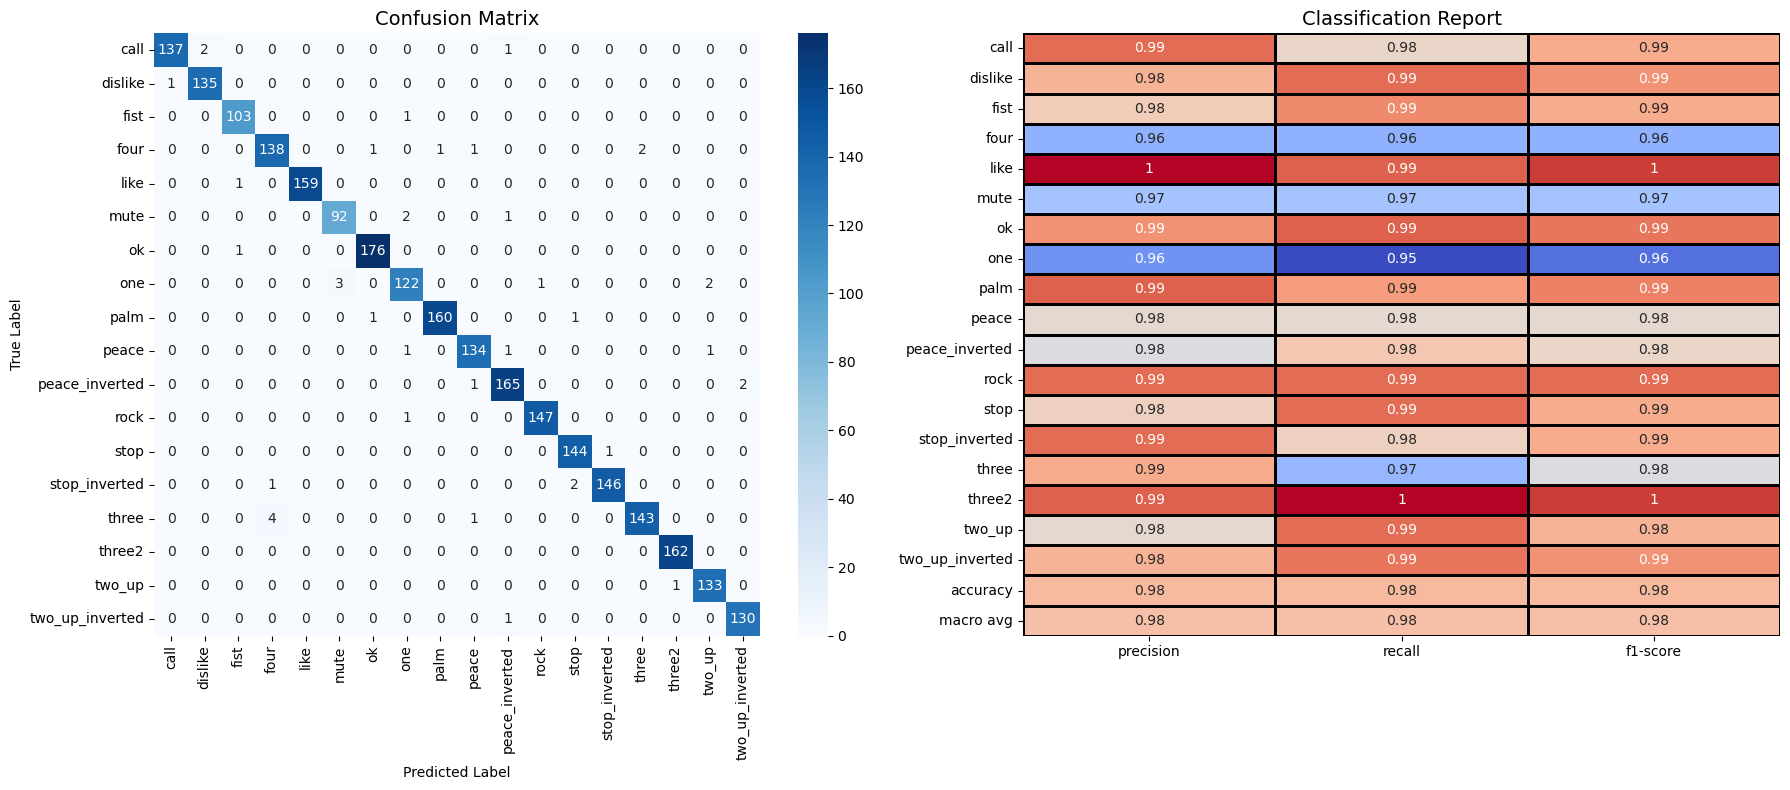

In [11]:
y_pred_3 = model_2_tuned.predict(x_val)

# Evaluate accuracy
accuracy = accuracy_score(y_val, y_pred_3)
print(f"LightGBM Accuracy after tuning: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_val, y_pred_3)
class_names = (labels.unique())

# Convert Classification Report to DataFrame
class_report_dict = classification_report(y_val, y_pred_3, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).T.round(3)


fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title("Confusion Matrix", fontsize=14)
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot Classification Report
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm",
            linewidths=1, linecolor='black', cbar=False, ax=axes[1])
axes[1].set_title("Classification Report", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()

# Final Test

In [12]:
y_pred_test = model_2_tuned.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Test Set Accuracy: 0.9813


# Train on all the Data


In [ ]:
model_2_tuned.fit(features, labels)  


# Saving model 


In [15]:
with open('LGBM.pkl', 'wb') as file:
    pickle.dump(model_2_tuned, file)


# Load Model


In [16]:
import os
print(os.path.getsize('LGBM.pkl'))  # Should be > 0


6463596


In [17]:
with open('LGBM.pkl', 'rb') as file:
    model = pickle.load(file)

# with open('label_encoder.pkl', 'rb') as f:
#     label_encoder = pickle.load(f)

# Integrate Model with Mediapipe 

In [20]:
# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands( max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Create column names matching your training data format
columns = []
for i in range(1, 22):
    columns.extend([f'x{i}', f'y{i}', f'z{i}'])

# Initialize video capture
cap = cv.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB for MediaPipe
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    predicted_label = "No Hand Detected"  # Default text

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract and flatten landmarks
            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z])

            # Create DataFrame with proper column names
            landmarks_df = pd.DataFrame([landmarks], columns=columns)

            # Apply your custom normalization
            x_cols = [col for col in columns if col.startswith('x')]
            y_cols = [col for col in columns if col.startswith('y')]
            
            # Subtract reference point (x1, y1)
            landmarks_df[x_cols] = landmarks_df[x_cols].sub(landmarks_df['x1'], axis=0)
            landmarks_df[y_cols] = landmarks_df[y_cols].sub(landmarks_df['y1'], axis=0)

            # Calculate normalization distance
            euclidean_distance = np.sqrt(landmarks_df['x13']**2 + landmarks_df['y13']**2)
            euclidean_distance = euclidean_distance.replace(0, 1e-9)

            # Normalize coordinates
            landmarks_df[x_cols] = landmarks_df[x_cols].div(euclidean_distance, axis=0)
            landmarks_df[y_cols] = landmarks_df[y_cols].div(euclidean_distance, axis=0)

            # Make prediction
            prediction = model.predict(landmarks_df)
            predicted_label = f"Gesture: {prediction[0]}"

    # Display prediction
    cv.putText(frame, predicted_label, (10, 50),
               cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)

    # Show output
    cv.imshow("Hand Gesture Recognition", frame)

    # Exit on 'q' press
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()